# Applied Deep Learning - a use case based approach to understand deep neural networks

### Umberto Michelucci

Buy the book: https://www.apress.com/us/book/9781484237892

(C) Umberto Michelucci 2018-2019 - umberto.michelucci@gmail.com 

github repository: https://github.com/Apress/applied-deep-learning

## Libraries

In [1]:
import numpy as np
from sklearn.datasets import fetch_mldata

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

from random import *

## Data preparation

To get MNIST data we use the function fetch_mldata, in the datasets package. Let's get all the dataset, and then we will select only the digits we want.

In [2]:
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [3]:
Xinput_,yinput_ = mnist["data"], mnist["target"]

In [4]:
Xinput_.shape

(70000, 784)

In [5]:
yinput_.shape

(70000,)

To know how many digits we have we can run this simple code

In [6]:
total = 0
for i in range(10):
    print ("digit", i, "appear", np.count_nonzero(yinput_ == i), "times")

digit 0 appear 6903 times
digit 1 appear 7877 times
digit 2 appear 6990 times
digit 3 appear 7141 times
digit 4 appear 6824 times
digit 5 appear 6313 times
digit 6 appear 6876 times
digit 7 appear 7293 times
digit 8 appear 6825 times
digit 9 appear 6958 times


In [7]:
total = 0
for i in range(2):
    print ("digit", i, "makes", np.around(np.count_nonzero(yinput_ == i)/70000.0*100.0, decimals=1), "% of the 70000 observations")

digit 0 makes 9.9 % of the 70000 observations
digit 1 makes 11.3 % of the 70000 observations


# k-fold dataset creation

In [8]:
Xinput = Xinput_[np.any([yinput_ == 1,yinput_ == 2], axis = 0)]
yinput = yinput_[np.any([yinput_ == 1,yinput_ == 2], axis = 0)]

In [9]:
yinput = yinput - 1

In [10]:
total = 0
for i in range(0,2,1):
    print ("Label", i, "makes", np.around(np.count_nonzero(yinput == i)/14867.0*100.0, decimals=1), "% of the 14867 observations")

Label 0 makes 53.0 % of the 14867 observations
Label 1 makes 47.0 % of the 14867 observations


We need to remove 3 observations to make the division by 10 (for the folds) easier

In [11]:
Xinput = Xinput[:-7,:]
yinput = yinput[:-7]

In [12]:
(Xinput.shape[0])

14860

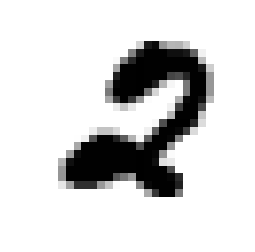

In [13]:
some_digit = Xinput[8999,:]

some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

In [14]:
foldnumber = 10
idx = np.arange(0,Xinput.shape[0])
np.random.shuffle(idx)
al = np.array_split(idx,foldnumber)

print('Number of folds:',len(al))
print('Number of elements in each fold:',len(al[9]))

Number of folds: 10
Number of elements in each fold: 1486


In [15]:
Xinputfold = []
yinputfold = []
for i in range(foldnumber):
    tmp = Xinput[al[i],:]
    Xinputfold.append(tmp)
    ytmp = yinput[al[i]]
    yinputfold.append(ytmp)

    
Xinputfold = np.asarray(Xinputfold)
yinputfold = np.asarray(yinputfold)

In [16]:
print(Xinputfold.shape)
print(yinputfold.shape)

(10, 1486, 784)
(10, 1486)


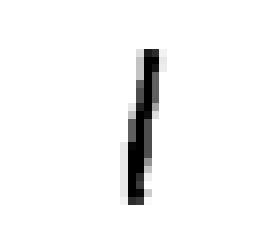

In [17]:
some_digit = Xinputfold[0][1234,:]

some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

Ratio of ones and twos in Fold 0

In [18]:
total = 0
for i in range(0,2,1):
    print ("digit", i, "makes", np.around(np.count_nonzero(yinputfold[0] == i)/1486.0*100.0, decimals=1), "% of the 1486 observations")

digit 0 makes 53.4 % of the 1486 observations
digit 1 makes 46.6 % of the 1486 observations


## Data normalization and preparation

In [19]:
Xinputfold_normalized = np.zeros_like(Xinputfold, dtype = float)
for i in range (foldnumber):
    Xinputfold_normalized[i] = Xinputfold[i]/255.0

In [20]:
X_train = []
y_train = []
for i in range(foldnumber):
    tmp = Xinputfold_normalized[i].transpose()
    ytmp = yinputfold[i].reshape(1,yinputfold[i].shape[0])
    X_train.append(tmp)
    y_train.append(ytmp)
    
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [21]:
print(X_train.shape)
print(y_train.shape)

(10, 784, 1486)
(10, 1, 1486)



### Checks

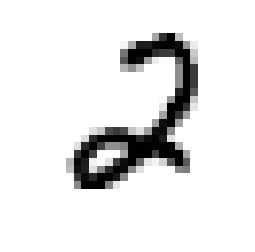

In [23]:
some_digit = X_train[0][:,10]

some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

## Model and tests

In [24]:
n_dim = 784

In [25]:
import tensorflow as tf

In [26]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, [n_dim, None])
Y = tf.placeholder(tf.float32, [1, None])
learning_rate = tf.placeholder(tf.float32, shape=())

W = tf.Variable(tf.random_normal([1, n_dim], stddev= 2.0 / np.sqrt(2.0*n_dim))) 
b = tf.Variable(tf.zeros(1))

In [27]:
y_ = tf.sigmoid(tf.matmul(W,X)+b)
cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))
training_step = tf.train.AdamOptimizer(learning_rate = learning_rate, beta1 = 0.9, beta2 = 0.999, epsilon = 1e-8).minimize(cost)

init = tf.global_variables_initializer()

In [28]:
def run_logistic_model(learning_r, training_epochs, train_obs, train_labels, debug = False):
    sess = tf.Session()
    sess.run(init)
    
    cost_history = np.empty(shape=[0], dtype = float)

    for epoch in range(training_epochs+1):
        
        sess.run(training_step, feed_dict = {X: train_obs, Y: train_labels, learning_rate: learning_r})

        cost_ = sess.run(cost, feed_dict={ X:train_obs, Y: train_labels, learning_rate: learning_r})
        cost_history = np.append(cost_history, cost_)
        
        if (epoch % 200 == 0) & debug:
            print("Reached epoch",epoch,"cost J =", str.format('{0:.6f}', cost_))
            
    return sess, cost_history

## Training on Fold 1

Remember that the shape of ```X_train[1]``` is

In [33]:
X_train[1].shape

(784, 1486)

Now let's train our network on Fold with index ```1```

In [29]:
sess, cost_history = run_logistic_model(learning_r = 5e-4, 
                                training_epochs = 600, 
                                train_obs = X_train[1], 
                                train_labels = y_train[1], 
                                debug = True)

Reached epoch 0 cost J = 0.779379
Reached epoch 200 cost J = 0.166642
Reached epoch 400 cost J = 0.094669
Reached epoch 600 cost J = 0.068902


In [31]:
correct_prediction=tf.equal(tf.greater(y_, 0.5), tf.equal(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Train accuracy:',sess.run(accuracy, feed_dict={X:X_train[1], Y: y_train[1], learning_rate: 0.01}))


Train accuracy: 0.9858681


In [35]:
train_acc = []
dev_acc = []


for i in range (foldnumber): 
    
    # Prepare the folds
    lis = []
    ylis = []
    for k in np.delete(np.arange(foldnumber), i):
        lis.append(X_train[k])
        ylis.append(y_train[k])
        X_train_ = np.concatenate(lis, axis = 1)
        y_train_ = np.concatenate(ylis, axis = 1)
    X_train_ = np.asarray(X_train_)
    y_train_ = np.asarray(y_train_)
    
    X_dev_ = X_train[i]
    y_dev_ = y_train[i]
    
    print('Dev fold is', i)
    sess, cost_history = run_logistic_model(learning_r = 5e-4, 
                                training_epochs = 600, 
                                train_obs = X_train_, 
                                train_labels = y_train_, 
                                debug = True)
    
    correct_prediction=tf.equal(tf.greater(y_, 0.5), tf.equal(Y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print('Train accuracy:',sess.run(accuracy, feed_dict={X:X_train_, Y: y_train_, learning_rate: 5e-4}))
    train_acc = np.append( train_acc, sess.run(accuracy, feed_dict={X:X_train_, Y: y_train_, learning_rate: 5e-4}))

    
    correct_prediction=tf.equal(tf.greater(y_, 0.5), tf.equal(Y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print('Dev accuracy:',sess.run(accuracy, feed_dict={X:X_dev_, Y: y_dev_, learning_rate: 5e-4}))
    dev_acc = np.append( dev_acc, sess.run(accuracy, feed_dict={X:X_dev_, Y: y_dev_, learning_rate: 5e-4}))
 

Dev fold is 0
Reached epoch 0 cost J = 0.643606
Reached epoch 200 cost J = 0.147986
Reached epoch 400 cost J = 0.089260
Reached epoch 600 cost J = 0.067967
Train accuracy: 0.98691493
Dev accuracy: 0.9899058
Dev fold is 1
Reached epoch 0 cost J = 0.702176
Reached epoch 200 cost J = 0.160618
Reached epoch 400 cost J = 0.096536
Reached epoch 600 cost J = 0.073037
Train accuracy: 0.9873635
Dev accuracy: 0.9845222
Dev fold is 2
Reached epoch 0 cost J = 0.760782
Reached epoch 200 cost J = 0.171399
Reached epoch 400 cost J = 0.101488
Reached epoch 600 cost J = 0.075848
Train accuracy: 0.9867654
Dev accuracy: 0.9858681
Dev fold is 3
Reached epoch 0 cost J = 0.721512
Reached epoch 200 cost J = 0.161293
Reached epoch 400 cost J = 0.096696
Reached epoch 600 cost J = 0.073008
Train accuracy: 0.9874383
Dev accuracy: 0.9831763
Dev fold is 4
Reached epoch 0 cost J = 0.653751
Reached epoch 200 cost J = 0.156322
Reached epoch 400 cost J = 0.093289
Reached epoch 600 cost J = 0.070187
Train accuracy: 0.9

In [36]:
np.max(train_acc)

0.9874383211135864

In [37]:
np.max(dev_acc)

0.9905787110328674

In [40]:
train_std = np.std(train_acc)
dev_std = np.std(dev_acc)

train_avg = np.average(train_acc)
dev_avg = np.average(dev_acc)

print('train std-dev', train_std)
print('dev std-dev',dev_std)

print('trian avg',train_avg)
print('dev avg',dev_avg)


train std-dev 0.0005512819947541776
dev std-dev 0.0022969019517442746
trian avg 0.9867803156375885
dev avg 0.9862045705318451


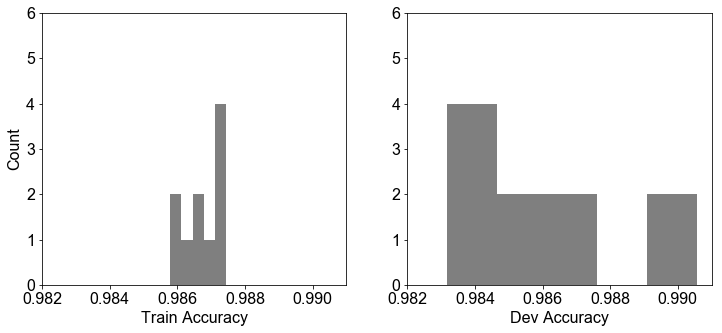

In [49]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
plt.hist(train_acc, bins = 5, color = 'black', alpha = 0.5)
ax.set_ylim(0,6)
ax.set_xlim(0.982,0.991)
ax.set_xlabel('Train Accuracy', fontsize = 16)
ax.set_ylabel('Count', fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

ax = fig.add_subplot(1, 2, 2)
ax.set_ylim(0,6)
ax.set_xlim(0.982,0.991)
plt.hist(dev_acc, bins = 5, color = 'black', alpha = 0.5)
ax.set_xlabel('Dev Accuracy', fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

plt.show()

# Case for splitting with 1-vs-all

In [73]:
y_ = np.zeros_like(yinput_)
y_[np.any([yinput_ == 0], axis = 0)] = 0
y_[np.any([yinput_ > 0], axis = 0)] = 1

In [74]:
Xinput_.shape

(70000, 784)

In [75]:
np.random.seed(42)
rnd = np.random.rand(len(y_)) < 0.8

X_train = Xinput_[rnd,:]
y_train = y_[rnd]
X_dev = Xinput_[~rnd,:]
y_dev = y_[~rnd]

In [76]:
total = 0
for i in range(2):
    print ("class", i, "makes", np.around(np.count_nonzero(y_train == i)/56056.0*100.0, decimals=1), "% of the 56056 observations")

class 0 makes 9.9 % of the 56056 observations
class 1 makes 90.1 % of the 56056 observations


In [77]:
total = 0
for i in range(2):
    print ("class", i, "makes", np.around(np.count_nonzero(y_dev == i)/13944.0*100.0, decimals=1), "% of the 13944 observations")

class 0 makes 9.7 % of the 13944 observations
class 1 makes 90.3 % of the 13944 observations


In [78]:
total = 0
for i in range(2):
    print ("class", i, "appears", np.count_nonzero(y_train == i), " times")

class 0 appears 5547  times
class 1 appears 50509  times


## Normalisation

Let's normalise our data. The pixel will have a value between 0 and 255 (gray values). Let's normalise the value between 0 and 1.

In [79]:
X_train_normalised = X_train/255.0
X_dev_normalised = X_dev/255.0

Remember that we need features along the rows, and training cases along the columns. So let's reshape our dataset

In [80]:
X_train_tr = X_train_normalised.transpose()
y_train_tr = y_train.reshape(1,y_train.shape[0])

X_dev_tr = X_dev_normalised.transpose()
y_dev_tr = y_dev.reshape(1,y_dev.shape[0])


n_dim = X_train_tr.shape[0]
dim_train = X_train_tr.shape[1]
dim_dev = X_dev_tr.shape[1]

Let's give our variables reasonable names

In [81]:
Xtrain = X_train_tr
ytrain = y_train_tr

Xdev = X_dev_tr
ydev = y_dev_tr

# Tensorflow Implementation

In [85]:
import tensorflow as tf

In [87]:
print(Xtrain.shape)
print(ytrain.shape)
print(Xdev.shape)
print(ydev.shape)

(784, 56056)
(1, 56056)
(784, 13944)
(1, 13944)


In [88]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, [n_dim, None])
Y = tf.placeholder(tf.float32, [1, None])
learning_rate = tf.placeholder(tf.float32, shape=())

W = tf.Variable(tf.zeros([1, n_dim]))
b = tf.Variable(tf.zeros(1))

init = tf.global_variables_initializer()

In [89]:
y_ = tf.sigmoid(tf.matmul(W,X)+b)
cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [90]:
def run_logistic_model(learning_r, training_epochs, train_obs, train_labels, debug = False):
    sess = tf.Session()
    sess.run(init)
    
    cost_history = np.empty(shape=[0], dtype = float)

    for epoch in range(training_epochs+1):
        
        sess.run(training_step, feed_dict = {X: train_obs, Y: train_labels, learning_rate: learning_r})

        cost_ = sess.run(cost, feed_dict={ X:train_obs, Y: train_labels, learning_rate: learning_r})
        cost_history = np.append(cost_history, cost_)
        
        if (epoch % 10 == 0) & debug:
            print("Reached epoch",epoch,"cost J =", str.format('{0:.6f}', cost_))
            
    return sess, cost_history

In [91]:
sess, cost_history = run_logistic_model(learning_r = 0.01, 
                                training_epochs = 100, 
                                train_obs = Xtrain, 
                                train_labels = ytrain, 
                                debug = True)

Reached epoch 0 cost J = 0.639774
Reached epoch 10 cost J = 0.412214
Reached epoch 20 cost J = 0.349503
Reached epoch 30 cost J = 0.317864
Reached epoch 40 cost J = 0.295897
Reached epoch 50 cost J = 0.278217
Reached epoch 60 cost J = 0.263053
Reached epoch 70 cost J = 0.249696
Reached epoch 80 cost J = 0.237795
Reached epoch 90 cost J = 0.227135
Reached epoch 100 cost J = 0.217555


In [92]:
correct_prediction1=tf.equal(tf.greater(y_, 0.5), tf.equal(Y,1))
accuracy1 = tf.reduce_mean(tf.cast(correct_prediction1, tf.float32))
print(sess.run(accuracy1, feed_dict={X:Xtrain, Y: ytrain, learning_rate: 0.05}))

0.91269445


In [93]:
from sklearn.metrics import confusion_matrix

In [94]:
ypred = sess.run(tf.greater(y_, 0.5), feed_dict={X:Xtrain, Y: ytrain, learning_rate: 0.05}).flatten().astype(int)
confusion_matrix(ytrain.flatten(), ypred)

array([[  659,  4888],
       [    6, 50503]], dtype=int64)

In [95]:
ypred = sess.run(tf.greater(y_, 0.5), feed_dict={X:Xdev, Y: ydev, learning_rate: 0.05}).flatten().astype(int)
confusion_matrix(ydev.flatten(), ypred)

array([[  150,  1206],
       [    2, 12586]], dtype=int64)

In [96]:
correct_prediction1=tf.equal(tf.greater(y_, 0.5), tf.equal(Y,1))
accuracy1 = tf.reduce_mean(tf.cast(correct_prediction1, tf.float32))
print(sess.run(accuracy1, feed_dict={X:Xdev, Y: ydev, learning_rate: 0.05}))

0.91336775


# Exercise 1: use downsampling to fit the data - difficulty: medium

Create a new dataset taking balanced classes, meaning you need only 10% of class 1. Train your network with the new dataset and check the confusion matrix. What is different from the example above? What do you expect and do you get it?